In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from PIL import Image, ImageDraw
  

In [2]:
def Ux(F,X,Y,X0,Y0,eta):
    temp1  = (8*3.141*eta)**-1
    temp2  = F[0]/np.sqrt((X-X0)**2+(Y-Y0)**2)
    temp3_1= F[0]*(X-X0)+F[1]*(Y-Y0)
    temp3  = (X-X0)*temp3_1/(np.sqrt((X-X0)**2+(Y-Y0)**2))**3
    
    return(temp1*(temp2+temp3))

def Uy(F,X,Y,X0,Y0,eta):
    temp1  = (8*3.141*eta)**-1
    temp2  = F[1]/np.sqrt((X-X0)**2+(Y-Y0)**2)
    temp3_1= F[0]*(X-X0)+F[1]*(Y-Y0)
    temp3  = (Y-Y0)*temp3_1/(np.sqrt((X-X0)**2+(Y-Y0)**2))**3
    
    return(temp1*(temp2+temp3))

In [33]:
p     = 100
eta   = 2E-5
theta = 90
X0    = 0
Y0    = .2
h     = 0.2

# 1D arrays
X = np.linspace(-.3,.3,200)
Y = np.linspace(-.3,.3,200)

# Meshgrid
X1,Y1 = np.meshgrid(X,Y)

# forces and location
mF1 = 1; theta1 = -90
mF3 = 0; theta3 = theta1
h   =.1; X0 = 0; Y0 = .1
o   = 0.02

In [34]:
F1 = [mF1*np.cos(3.141*theta1/180),mF1*np.sin(3.141*theta1/180)]
F2 = [-mF1*np.cos(3.141*theta1/180),-mF1*np.sin(3.141*theta1/180)]
F3 = [mF3*np.cos(3.141*theta3/180),mF3*np.sin(3.141*theta3/180)]

R1 = [X0+0.5*h*np.cos(3.141*theta1/180),Y0+0.5*h*np.sin(3.141*theta1/180)]
R2 = [X0-0.5*h*np.cos(3.141*theta1/180),Y0-0.5*h*np.sin(3.141*theta1/180)]
R3 = [X0+o*np.cos(3.141*theta1/180)    ,Y0+o*np.sin(3.141*theta1/180)]

iF1 = [mF1*np.cos(3.141*theta1/180),-mF1*np.sin(3.141*theta1/180)]
iF2 = [-mF1*np.cos(3.141*theta1/180),+mF1*np.sin(3.141*theta1/180)]
iF3 = [mF3*np.cos(3.141*theta3/180),-mF1*np.sin(3.141*theta3/180)]

iR1 = [X0+0.5*h*np.cos(3.141*theta1/180),-Y0-0.5*h*np.sin(3.141*theta1/180)]
iR2 = [X0-0.5*h*np.cos(3.141*theta1/180),-Y0+0.5*h*np.sin(3.141*theta1/180)]
iR3 = [X0+o*np.cos(3.141*theta1/180),-Y0-o*np.sin(3.141*theta1/180)]


In [35]:
Ex1 = Ux(F1,X1,Y1,R1[0],R1[1],eta)+Ux(F2,X1,Y1,R2[0],R2[1],eta)+Ux(F3,X1,Y1,R3[0],R3[1],eta)
Ey1 = Uy(F1,X1,Y1,R1[0],R1[1],eta)+Uy(F2,X1,Y1,R2[0],R2[1],eta)+Uy(F3,X1,Y1,R3[0],R3[1],eta)



(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

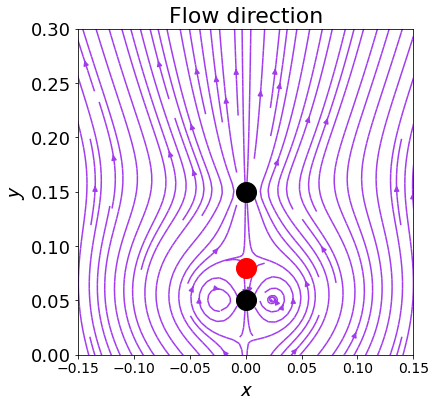

In [36]:
Ex2 = Ux(iF1,X1,Y1,iR1[0],iR1[1],eta)+Ux(iF2,X1,Y1,iR2[0],iR2[1],eta)+Ux(iF3,X1,Y1,iR3[0],iR3[1],eta)
Ey2 = Uy(iF1,X1,Y1,iR1[0],iR1[1],eta)+Uy(iF2,X1,Y1,iR2[0],iR2[1],eta)+Uy(iF3,X1,Y1,iR3[0],iR3[1],eta)

Ex = Ex1+Ex2
Ey = Ey1+Ey2


plt.figure(figsize=(6, 6))
#plt.streamplot(X,Y,Ex,Ey, density= 1.4, linewidth=1, color='#A23BEC')
plt.streamplot(X1,Y1,Ex,Ey, density= 3, linewidth=None, color='#A23BEC')
#plt.contour(X1, Y1, Ex, 200, cmap='rainbow')
plt.plot(R1[0],R1[1],'-ok',markersize=20)
plt.plot(R2[0],R2[1],'-ok',markersize=20)
plt.plot(R3[0],R3[1],'-or',markersize=20)
#plt.plot(-h/2,0,'-og')
plt.ylim(0,.3)
plt.xlim(-.15,.15)
plt.xlabel('$\mathcal{x}$',fontsize=22)
plt.ylabel('$\mathcal{y}$',fontsize=22)
plt.title('Flow direction',fontsize=22)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 18)
#plt.savefig('90vec.eps')

# X-Velocity contour

Text(-0.1, 0.278, '$V_{x,max} = 4.8 X 10^{-5}$')

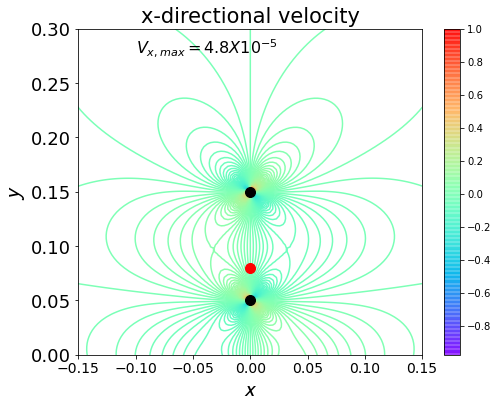

In [37]:
plt.figure(figsize=(7.7, 6))
plt.contour(X1, Y1, Ex/np.amax(Ex), 300, cmap='rainbow')
plt.ylim(0,.3)
plt.xlim(-.15,.15)
plt.colorbar();
plt.plot(R1[0],R1[1],'-ok',markersize=10)
plt.plot(R2[0],R2[1],'-ok',markersize=10)
plt.plot(R3[0],R3[1],'-or',markersize=10)
plt.xlabel('$\mathcal{x}$',fontsize=22)
plt.ylabel('$\mathcal{y}$',fontsize=22)
plt.title('x-directional velocity',fontsize=21)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 18)
plt.text(-.1, .278, '$V_{x,max} = 4.8 X 10^{-5}$' , fontsize = 16)
#plt.savefig('90Xv.eps')

In [38]:
np.amax(Ex)

479042.1411554789

# Y-Velocity contour


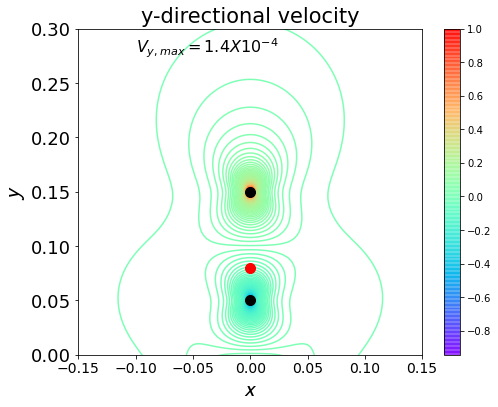

In [39]:
plt.figure(figsize=(7.7, 6))
plt.contour(X1, Y1, Ey/np.amax(Ey), 300, cmap='rainbow')
plt.ylim(0,.3)
plt.xlim(-.15,.15)
plt.colorbar();
plt.xlabel('$\mathcal{x}$',fontsize=22)
plt.ylabel('$\mathcal{y}$',fontsize=22)
plt.title('y-directional velocity',fontsize=21)
plt.plot(R1[0],R1[1],'-ok',markersize=10)
plt.plot(R2[0],R2[1],'-ok',markersize=10)
plt.plot(R3[0],R3[1],'-or',markersize=10)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 18)
plt.text(-.1, .278, '$V_{y,max} = 1.4 X 10^{-4}$' , fontsize = 16)
plt.savefig('90Yv.eps')

In [40]:
np.amax(Ey)

1422375.2248600014

(array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

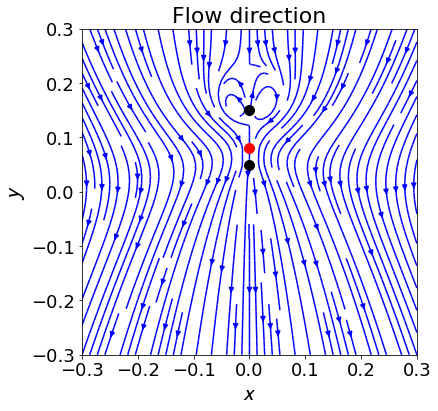

In [18]:
plt.figure(figsize=(6, 6))

plt.streamplot(X1,Y1,Ex1,Ey1, density= 1.5, linewidth=None, color= 'b')
plt.plot(R1[0],R1[1],'-ok',markersize=10)
plt.plot(R2[0],R2[1],'-ok',markersize=10)
plt.plot(R3[0],R3[1],'-or',markersize=10)
plt.ylim(-.3,.3)
plt.xlim(-.3,.3)
plt.xlabel('$\mathcal{x}$',fontsize=22)
plt.ylabel('$\mathcal{y}$',fontsize=22)
plt.title('Flow direction',fontsize=22)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)

Text(-0.1, 0.278, '$V_{x,max} = 4.8 X 10^{-5}$')

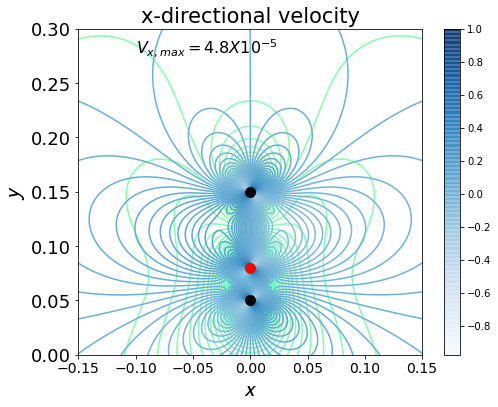

In [24]:
plt.figure(figsize=(7.7, 6))
plt.contour(X1, Y1, Ey1/np.amax(Ey1), 300, cmap='rainbow')
plt.contour(X1, Y1, Ex1/np.amax(Ex1), 300, cmap='Blues')
plt.ylim(0,.3)
plt.xlim(-.15,.15)
plt.colorbar();
plt.plot(R1[0],R1[1],'-ok',markersize=10)
plt.plot(R2[0],R2[1],'-ok',markersize=10)
plt.plot(R3[0],R3[1],'-or',markersize=10)
plt.xlabel('$\mathcal{x}$',fontsize=22)
plt.ylabel('$\mathcal{y}$',fontsize=22)
plt.title('x-directional velocity',fontsize=21)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 18)
plt.text(-.1, .278, '$V_{x,max} = 4.8 X 10^{-5}$' , fontsize = 16)


p     = 100
eta   = 2E+5
theta = 90
X0    = 0
Y0    = .2
h     = 0.2

# 1D arrays
X = np.linspace(-.3,.3,200)
Y = np.linspace(-.3,.3,200)

# Meshgrid
X1,Y1 = np.meshgrid(X,Y)


F1_mag = 1
theta1 = 0

F1 = [-1,0]
X01 = -h/2
Y01 = 0

F2 = [1,0]
X02 = h/2
Y02 = 0.0

F3 = [.5,0]
X03 = -h/4
Y03 = 0

Ex1 = Ux(F1,X1,Y1,X01,Y01,eta)+Ux(F2,X1,Y1,X02,Y02,eta)+Ux(F3,X1,Y1,X03,Y03,eta)

Ey1 = Uy(F1,X1,Y1,X01,Y01,eta)+Uy(F2,X1,Y1,X02,Y02,eta)+Uy(F3,X1,Y1,X03,Y03,eta)

F1 = [-1,0]
X01 = -h/2
Y01 = 0

F2 = [1,0]
X02 = h/2
Y02 = -.05

F3 = [1,0]
X03 = h/4
Y03 = 0

Ex2 = Ux(F1,X1,Y1,X01,Y01,eta)+Ux(F2,X1,Y1,X02,Y02,eta)+Ux(F3,X1,Y1,X03,Y03,eta)

Ey2 = Uy(F1,X1,Y1,X01,Y01,eta)+Uy(F2,X1,Y1,X02,Y02,eta)+Uy(F3,X1,Y1,X03,Y03,eta)

Ex = Ex1#+Ex2
Ey = Ey1#+Ey2


plt.figure(figsize=(6, 6))
#plt.streamplot(X,Y,Ex,Ey, density= 1.4, linewidth=1, color='#A23BEC')
plt.streamplot(X1,Y1,Ex,Ey, density= 1.5, linewidth=None, color= 'b')
#plt.contour(X1, Y1, Ex, 200, cmap='rainbow')
plt.plot(-h/2,-Y01,'-ok',markersize=20)
plt.plot(h/2,-Y01,'-ok',markersize=20)
plt.plot(-h/4,-Y01,'-or',markersize=20)
#plt.plot(-h/2,0,'-og')
plt.ylim(-.3,.3)
plt.xlim(-.3,.3)
plt.xlabel('$\mathcal{x}$',fontsize=22)
plt.ylabel('$\mathcal{y}$',fontsize=22)
plt.title('Flow direction',fontsize=22)
plt.xticks(fontsize= 18)
plt.yticks(fontsize= 18)